# Demo notebook for APPRAISE pairwise analysis

Author: Xiaozhe Ding

Email: xding@caltech.edu, dingxiaozhe@gmail.com

## Introduction

This demo notebook can be used to anlayze the pairwise competition results.

#### Check the environment

APPRAISE 1.2 was tested with the following environment. We suggest using versions equal or higher than these for optimal compatibility:

For input file preparation and data analysis:

 - MacOS 10.14.6

 - Python 3.6.10

 - PyMOL 2.3.3 (Schrodinger LLC.)

 - Python packages: 
 
    - scipy 1.4.1

    - numpy 1.18.2

    - pandas 1.1.5

    - matplotlib 3.2.1

    - seaborn 0.11.2

For structural modeling:

- slphafold-colabfold 2.1.14 (Accessed using Google Colaboratory. Notebook available [here](https://github.com/sokrypton/ColabFold))
    - AlphaFold model version: AlphaFold-multimer-v2


#### APPRAISE package

If you haven't install the appraise package, run the following box in the notebook to install the package. ***You'll need to restart the kernal after installation***. 

Skip this block if the package had already been installed.

In [ ]:
!pip install -v ..

## Analyze the pair-wise-competition results

In [1]:
# Import common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary APPRAISE modules
import appraise
from appraise.utilities import *
from appraise.score_calculation import *

#### Load the measurements

Use the following block to load the .csv file generated by the PyMOL script. 

An example measurements is also available in the demo.

$ Variable <Path to database file (*.csv)> defaults to <'./database_APPRAISE_measurements_12291508.csv'>. Change it? Type new value or hit Enter to skip.


$  


$ Used default value.

$ Variable <Receptor of interest (need to match the name in input fasta file names)> defaults to <'Ly6a'>. Change it? Type new value or hit Enter to skip.


$  


$ Used default value.

$ Variable <R_minor of the receptor> defaults to <13.4>. Change it? Type new value or hit Enter to skip.


$  


$ Used default value.

$ Variable <Version of APPRAISE to use> defaults to <1.2>. Change it? Type new value or hit Enter to skip.


$  


$ Used default value.


A database with 22 peptides is successfully loaded! 


Quality check: 
     The following plot shows the number of models for each peptide variant in the database. 
     You should expect to see an equal number of models in all variants. 
     If the numbers are not equal, there might some models missing during structure prediction or quantification. You can still proceed with the risk of getting biased rankings.
     Double click on the plot to Zoom in. 


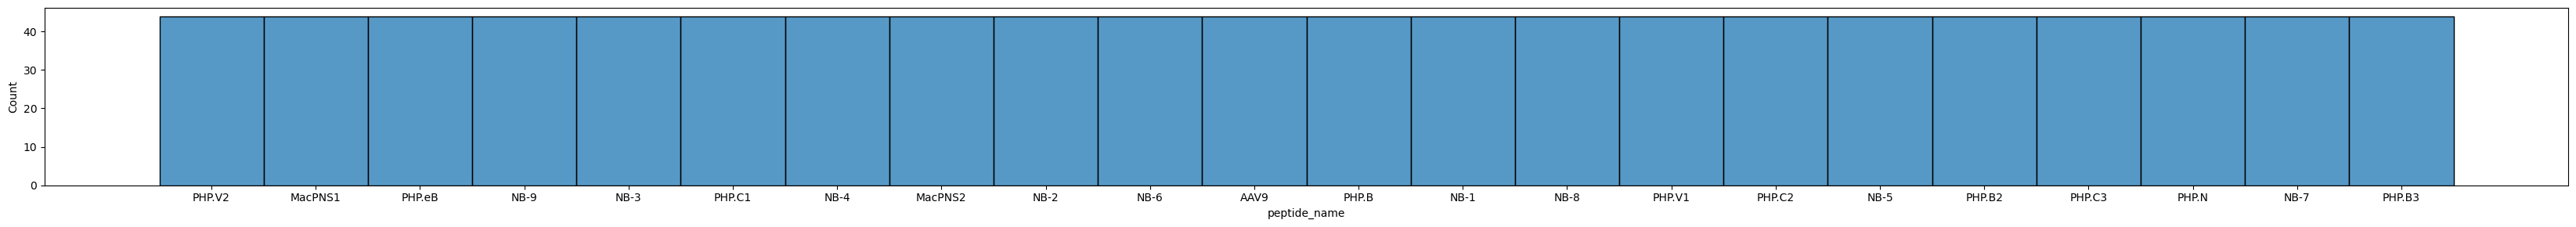

In [2]:
# Get the settings
database_path = interactive_input('Path to database file (*.csv)','./database_APPRAISE_measurements_12291508.csv')
receptor_of_interest = interactive_input('Receptor of interest (need to match the name in input fasta file names)', 'Ly6a')
receptor_Rminor = float(interactive_input('R_minor of the receptor', 13.4))
APPRAISE_version = float(interactive_input('Version of APPRAISE to use', 1.2))

# Read and calculate scores
df = pd.read_csv(database_path)
df = df.loc[df['receptor_name'] == receptor_of_interest].copy()
df['receptor_Rminor'] = receptor_Rminor
list_peptide_names, list_peptide_seqs = get_peptide_list_from_model_names(df)
print('\nA database with {} peptides is successfully loaded! \n'.format(len(list_peptide_names)))

database_quality_check(df)

#### Rank by average relative binding score ($\overline{\Delta B}_2^{POI, competitor}$)

Calculate the binding scores from each individual competition ($\Delta B_2^{POI, competitor}$) and get the mean binding scores ($\overline{\Delta B}_2^{POI, competitor}$):

In [ ]:
# Get a dataframe that is sorted pair-wise
df_pairwise_sorted = sort_df_by_peptides_and_cleanup(df, list_peptide_names)

# Calculate the pair-wise scores
df_pairwise_sorted = calculate_scores(df_pairwise_sorted, version=APPRAISE_version, depth_constraint=True)


# Get the mean binding scores
df_pairwise_average = df_pairwise_sorted.groupby(by=['peptide_name','competitor','peptide_seq']).mean().dropna(subset=['Delta_B']).reset_index()
print('Mean binding scores:')
df_pairwise_average[['peptide_name','competitor','Delta_B']]

Run the following code block to get a the absolute binding scores of the variants and a list of top peptides that can be used for stage 2.

The results will be saved in the save directory as the database.

Used p-value threshold of 0.050
Tie threshold to be nan of standard deviation: nan


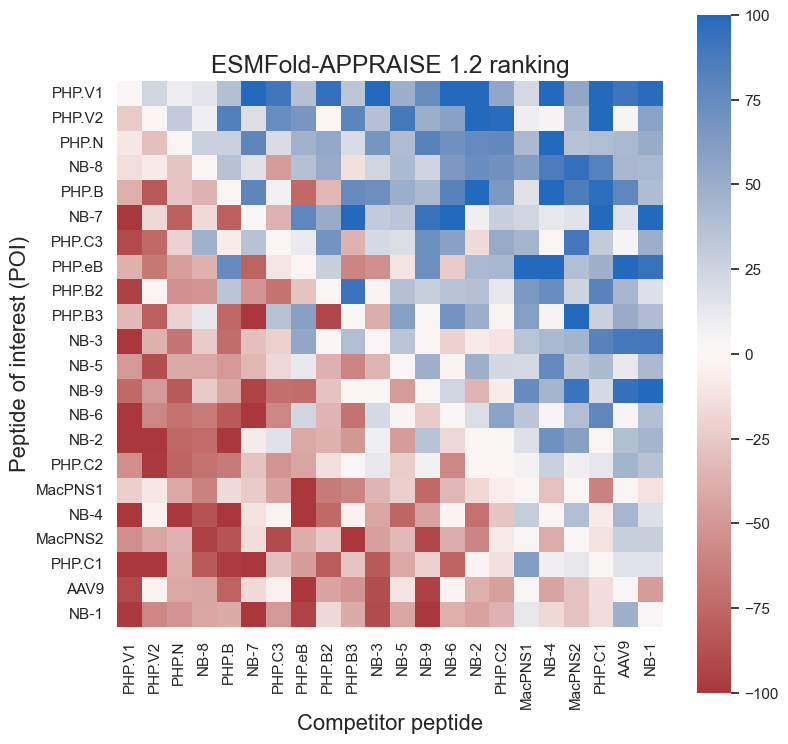

In [14]:
list_peptide_order, _, _ = plot_heatmap(df_pairwise_average, feature_of_interest='Delta_B', title='ESMFold-APPRAISE 1.2 ranking', rank_by_tournament=True, number_of_repeats=10, save_figure=False, p_value_threshold=0.05
                    , vmin=-100, vmax=100)
heatmap_figure_path = './pairwise_matrix.png'
plt.savefig(heatmap_figure_path, bbox_inches = 'tight', dpi=300)

In [10]:
print('APPRAISE analysis finished!')
print('The final ranking is: {}'.format(list_peptide_order))
print('The heatmap is saved as {}'.format(heatmap_figure_path))

APPRAISE analysis finished!
The final ranking is: ['PHP.V1', 'PHP.V2', 'PHP.N', 'NB-8', 'PHP.B', 'NB-7', 'PHP.C3', 'PHP.eB', 'PHP.B2', 'PHP.B3', 'NB-3', 'NB-5', 'NB-9', 'NB-6', 'NB-2', 'PHP.C2', 'MacPNS1', 'NB-4', 'MacPNS2', 'PHP.C1', 'AAV9', 'NB-1']
The heatmap is saved as ./pairwise_matrix.png
